In [1]:
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
data_d2v = {}
BASE_FILE_NAME = '../data/{0}_non_ia_doc2vec_clustering.json'

for i in range(1,501):
    try:
        data_d2v[i] = json.load(open(BASE_FILE_NAME.format(i), 'r'))
        print(BASE_FILE_NAME.format(i))
    except:
        pass
print('D2V done.')

data_n2v = {}
BASE_FILE_NAME = '../data/{0}_non_ia_node2vec_clustering_1.0_1.0.json'

for i in range(1,501):
    try:
        data_n2v[i] = json.load(open(BASE_FILE_NAME.format(i), 'r'))
        print(BASE_FILE_NAME.format(i))
    except:
        pass
print('N2V done.')

../data/1_non_ia_doc2vec_clustering.json
../data/2_non_ia_doc2vec_clustering.json
../data/5_non_ia_doc2vec_clustering.json
../data/10_non_ia_doc2vec_clustering.json
../data/15_non_ia_doc2vec_clustering.json
../data/20_non_ia_doc2vec_clustering.json
../data/25_non_ia_doc2vec_clustering.json
../data/30_non_ia_doc2vec_clustering.json
../data/35_non_ia_doc2vec_clustering.json
../data/40_non_ia_doc2vec_clustering.json
../data/45_non_ia_doc2vec_clustering.json
../data/50_non_ia_doc2vec_clustering.json
../data/55_non_ia_doc2vec_clustering.json
../data/60_non_ia_doc2vec_clustering.json
../data/65_non_ia_doc2vec_clustering.json
../data/70_non_ia_doc2vec_clustering.json
../data/75_non_ia_doc2vec_clustering.json
../data/80_non_ia_doc2vec_clustering.json
../data/85_non_ia_doc2vec_clustering.json
../data/90_non_ia_doc2vec_clustering.json
../data/95_non_ia_doc2vec_clustering.json
../data/100_non_ia_doc2vec_clustering.json
../data/105_non_ia_doc2vec_clustering.json
../data/110_non_ia_doc2vec_clusteri

../data/395_non_ia_node2vec_clustering_1.0_1.0.json
../data/400_non_ia_node2vec_clustering_1.0_1.0.json
../data/405_non_ia_node2vec_clustering_1.0_1.0.json
../data/410_non_ia_node2vec_clustering_1.0_1.0.json
../data/415_non_ia_node2vec_clustering_1.0_1.0.json
../data/420_non_ia_node2vec_clustering_1.0_1.0.json
../data/425_non_ia_node2vec_clustering_1.0_1.0.json
../data/430_non_ia_node2vec_clustering_1.0_1.0.json
../data/435_non_ia_node2vec_clustering_1.0_1.0.json
../data/440_non_ia_node2vec_clustering_1.0_1.0.json
../data/445_non_ia_node2vec_clustering_1.0_1.0.json
../data/450_non_ia_node2vec_clustering_1.0_1.0.json
../data/455_non_ia_node2vec_clustering_1.0_1.0.json
../data/460_non_ia_node2vec_clustering_1.0_1.0.json
../data/465_non_ia_node2vec_clustering_1.0_1.0.json
../data/470_non_ia_node2vec_clustering_1.0_1.0.json
../data/475_non_ia_node2vec_clustering_1.0_1.0.json
../data/480_non_ia_node2vec_clustering_1.0_1.0.json
../data/485_non_ia_node2vec_clustering_1.0_1.0.json
../data/490_

In [20]:
all_k = set(data_d2v.keys()).intersection(set(data_n2v.keys()))
data_d2v = {k : v for k,v in data_d2v.items() if k in all_k}
data_n2v = {k : v for k,v in data_n2v.items() if k in all_k}
assert len(data_d2v.keys())==len(data_n2v.keys())

In [8]:
from sklearn import metrics
from gensim import models

C:\Users\nebboy4\Anaconda3\envs\github_env\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [10]:
from doc2vec.doc2vec import doc2vec
from node2vec.node2vec import node2vec
from utilities import score_purity
from utilities import score_agreement

In [11]:
d2v_model = doc2vec(model=models.Doc2Vec.load("../data/scotus/scotus_model.doc2vec"),label_docs=False)
n2v_model = node2vec(model=models.Word2Vec.load("../data/scotus_n2v_1.0_1.0_mini.node2vec"))

In [12]:
d2v_embeddings = d2v_model.model.docvecs
n2v_embeddings = n2v_model.model.wv

In [23]:
node_order = {}
node_ids = []
k_to_kmeans_d2v = {}
k_to_hierarchical_d2v = {}
k_to_kmeans_n2v = {}
k_to_hierarchical_n2v = {}

for i in range(len(data_d2v[5]['node_ids'])):
    node_order[i] = data_d2v[5]['node_ids'][i]
    node_ids.append(data_d2v[5]['node_ids'][i])

# for i in range(len(data_n2v[5]['node_ids'])):
#     node_order_n2v[i] = data_n2v[5]['node_ids'][i]
#     node_ids_n2v.append(data_n2v[5]['node_ids'][i])
    
X_d2v = [d2v_embeddings[tag].tolist() for tag in node_ids]
X_n2v = [n2v_embeddings[tag].tolist() for tag in node_ids]

for k in list(set(data_d2v.keys()).intersection(set(data_n2v.keys()))):
    if k > 50 or k < 5:
        continue
    k_to_kmeans_d2v[k] = []
    k_to_hierarchical_d2v[k] = []
    k_to_kmeans_n2v[k] = []
    k_to_hierarchical_n2v[k] = []
    for n_id in node_ids:
        k_to_kmeans_d2v[k].append(data_d2v[k]['kmeans_labels'][data_d2v[k]['node_ids'].index(n_id)])
        k_to_hierarchical_d2v[k].append(data_d2v[k]['hierarchical_labels'][data_d2v[k]['node_ids'].index(n_id)])
        k_to_kmeans_n2v[k].append(data_n2v[k]['kmeans_labels'][data_n2v[k]['node_ids'].index(n_id)])
        k_to_hierarchical_n2v[k].append(data_n2v[k]['hierarchical_labels'][data_n2v[k]['node_ids'].index(n_id)])
#     k_to_kmeans_d2v[k] = [data_d2v[k]['kmeans_labels'][data_d2v[k]['node_ids'].index(n_id)] for n_id in node_ids]
#     k_to_hierarchical_d2v[k] = [data_d2v[k]['hierarchical_labels'][data_d2v[k]['node_ids'].index(n_id)] for n_id in node_ids]
#     k_to_kmeans_n2v[k] = [data_n2v[k]['kmeans_labels'][data_n2v[k]['node_ids'].index(n_id)] for n_id in node_ids]
#     k_to_hierarchical_n2v[k] = [data_n2v[k]['hierarchical_labels'][data_n2v[k]['node_ids'].index(n_id)] for n_id in node_ids]

print('complete')

complete


In [65]:
scores = {
    'vmeasure_kmeans' : {},
    'vmeasure_hierarchical' : {},
    'vmeasure_d2v' : {},
    'vmeasure_n2v' : {},
    'hom_kmeans' : {},
    'hom_hierarchical' : {},
    'hom_d2v' : {},
    'hom_n2v' : {},
    'nmi_kmeans' : {},
    'nmi_hierarchical' : {},
    'nmi_d2v' : {},
    'nmi_n2v' : {},
    'complete_kmeans' : {},
    'complete_hierarchical' : {},
    'complete_d2v' : {},
    'complete_n2v' : {},
    'mean_kmeans' : {},
    'mean_hierarchical' : {},
    'mean_d2v' : {},
    'mean_n2v' : {}
    #'agreement' : {},
#     'sil_hierarchical' : {},
#     'sil_kmeans' : {}
         }

for (k_d2v,v_d2v),(k_n2v,v_n2v) in zip(data_d2v.items(),data_n2v.items()):
    if k_d2v != k_n2v:
        print('SERIOUS PROBLEM:',k_d2v,'!=',k_n2vf)
    else:
        k = k_d2v
    if k > 50 or k < 5:
        continue
    scores['vmeasure_kmeans'][k] = metrics.v_measure_score(v_n2v['kmeans_labels'], v_d2v['kmeans_labels'])
    scores['vmeasure_hierarchical'][k] = metrics.v_measure_score(v_n2v['hierarchical_labels'], v_d2v['hierarchical_labels'])
    scores['vmeasure_d2v'][k] = metrics.v_measure_score(v_d2v['kmeans_labels'], v_d2v['hierarchical_labels'])
    scores['vmeasure_n2v'][k] = metrics.v_measure_score(v_n2v['kmeans_labels'], v_n2v['hierarchical_labels'])
    
    scores['hom_kmeans'][k] = metrics.homogeneity_score(v_n2v['kmeans_labels'], v_d2v['kmeans_labels'])
    scores['hom_hierarchical'][k] = metrics.homogeneity_score(v_n2v['hierarchical_labels'], v_d2v['hierarchical_labels'])
    scores['hom_d2v'][k] = metrics.homogeneity_score(v_d2v['kmeans_labels'], v_d2v['hierarchical_labels'])
    scores['hom_n2v'][k] = metrics.homogeneity_score(v_n2v['kmeans_labels'], v_n2v['hierarchical_labels'])
    
    scores['nmi_kmeans'][k] = metrics.normalized_mutual_info_score(v_n2v['kmeans_labels'], v_d2v['kmeans_labels'])
    scores['nmi_hierarchical'][k] = metrics.normalized_mutual_info_score(v_n2v['hierarchical_labels'], v_d2v['hierarchical_labels'])
    scores['nmi_d2v'][k] = metrics.normalized_mutual_info_score(v_d2v['kmeans_labels'], v_d2v['hierarchical_labels'])
    scores['nmi_n2v'][k] = metrics.normalized_mutual_info_score(v_n2v['kmeans_labels'], v_n2v['hierarchical_labels'])
    
    scores['complete_kmeans'][k] = metrics.completeness_score(v_n2v['kmeans_labels'], v_d2v['kmeans_labels'])
    scores['complete_hierarchical'][k] = metrics.completeness_score(v_n2v['hierarchical_labels'], v_d2v['hierarchical_labels'])
    scores['complete_d2v'][k] = metrics.completeness_score(v_d2v['kmeans_labels'], v_d2v['hierarchical_labels'])
    scores['complete_n2v'][k] = metrics.completeness_score(v_n2v['kmeans_labels'], v_n2v['hierarchical_labels'])
    
    scores['mean_kmeans'][k] = sum([scores['vmeasure_kmeans'][k],
                                    scores['hom_kmeans'][k],
                                    scores['nmi_kmeans'][k],
                                    scores['complete_kmeans'][k]
                                   ])/4
    
    scores['mean_hierarchical'][k] = sum([scores['vmeasure_hierarchical'][k],
                                    scores['hom_hierarchical'][k],
                                    scores['nmi_hierarchical'][k],
                                    scores['complete_hierarchical'][k]
                                   ])/4
    scores['mean_d2v'][k] = sum([scores['vmeasure_d2v'][k],
                                    scores['hom_d2v'][k],
                                    scores['nmi_d2v'][k],
                                    scores['complete_d2v'][k]
                                   ])/4
    scores['mean_n2v'][k] = sum([scores['vmeasure_n2v'][k],
                                    scores['hom_n2v'][k],
                                    scores['nmi_n2v'][k],
                                    scores['complete_n2v'][k]
                                   ])/4

#     scores['accuracy'][k] = metrics.accuracy_score(v['kmeans_labels'], v['hierarchical_labels'])
#     scores['nmi'][k] = metrics.normalized_mutual_info_score(v['kmeans_labels'], v['hierarchical_labels'])
#     scores['purity'][k] = score_purity(v['kmeans_labels'], v['hierarchical_labels'])
#     scores['sil_hierarchical'][k] = metrics.silhouette_score(X, k_to_hierarchical[k])
#     scores['sil_kmeans'][k] = metrics.silhouette_score(X, k_to_kmeans[k])
    #scores['agreement'][k] = score_agreement(v['kmeans_labels'], v['hierarchical_labels'])

In [66]:
plt.style.use('fivethirtyeight')

In [67]:
x = []
y_vmeasure_kmeans = []
y_vmeasure_hierarchical = []
y_vmeasure_d2v = []
y_vmeasure_n2v = []

y_hom_kmeans = []
y_hom_hierarchical = []
y_hom_d2v = []
y_hom_n2v = []

y_nmi_kmeans = []
y_nmi_hierarchical = []
y_nmi_d2v = []
y_nmi_n2v = []

y_complete_kmeans = []
y_complete_hierarchical = []
y_complete_d2v = []
y_complete_n2v = []

y_mean_kmeans = []
y_mean_hierarchical = []
y_mean_d2v = []
y_mean_n2v = []

# y_nmi = []
# y_purity = []
# y_agreement = []
# y_sil_kmeans = []
# y_sil_hierarchical = []


for k in list(set(data_d2v.keys()).intersection(set(data_n2v.keys()))):
    if k > 50 or k < 5:
        continue
    x.append(k)
    
    y_vmeasure_kmeans.append(scores['vmeasure_kmeans'][k])
    y_vmeasure_hierarchical.append(scores['vmeasure_hierarchical'][k])
    y_vmeasure_d2v.append(scores['vmeasure_d2v'][k])
    y_vmeasure_n2v.append(scores['vmeasure_n2v'][k])
    
    y_hom_kmeans.append(scores['hom_kmeans'][k])
    y_hom_hierarchical.append(scores['hom_hierarchical'][k])
    y_hom_d2v.append(scores['hom_d2v'][k])
    y_hom_n2v.append(scores['hom_n2v'][k])
    
    y_nmi_kmeans.append(scores['nmi_kmeans'][k])
    y_nmi_hierarchical.append(scores['nmi_hierarchical'][k])
    y_nmi_d2v.append(scores['nmi_d2v'][k])
    y_nmi_n2v.append(scores['nmi_n2v'][k])
    
    y_complete_kmeans.append(scores['complete_kmeans'][k])
    y_complete_hierarchical.append(scores['complete_hierarchical'][k])
    y_complete_d2v.append(scores['complete_d2v'][k])
    y_complete_n2v.append(scores['complete_n2v'][k])
    
    y_mean_kmeans.append(scores['mean_kmeans'][k])
    y_mean_hierarchical.append(scores['mean_hierarchical'][k])
    y_mean_d2v.append(scores['mean_d2v'][k])
    y_mean_n2v.append(scores['mean_n2v'][k])
    
#     y_nmi.append(scores['nmi'][k])
#     y_purity.append(scores['purity'][k])
#     y_agreement.append(scores['agreement'][k])
#     y_sil_kmeans.append(scores['sil_kmeans'][k])
#     y_sil_hierarchical.append(scores['sil_hierarchical'][k])

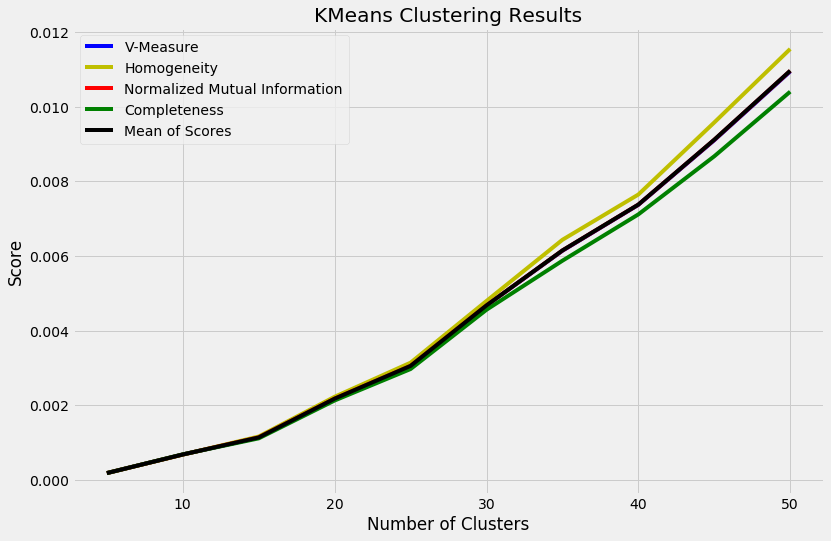

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('KMeans Clustering Results')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.plot(x, y_vmeasure_kmeans, color='b', label="V-Measure")
ax.plot(x, y_hom_kmeans, color='y', label="Homogeneity")
ax.plot(x, y_nmi_kmeans, color='r', label="Normalized Mutual Information")
ax.plot(x, y_complete_kmeans, color='g', label="Completeness")
ax.plot(x, y_mean_kmeans, color='black', label="Mean of Scores")
ax.legend(loc='best')
fig.savefig('../data/kmeans_d2v_n2v_first.png')

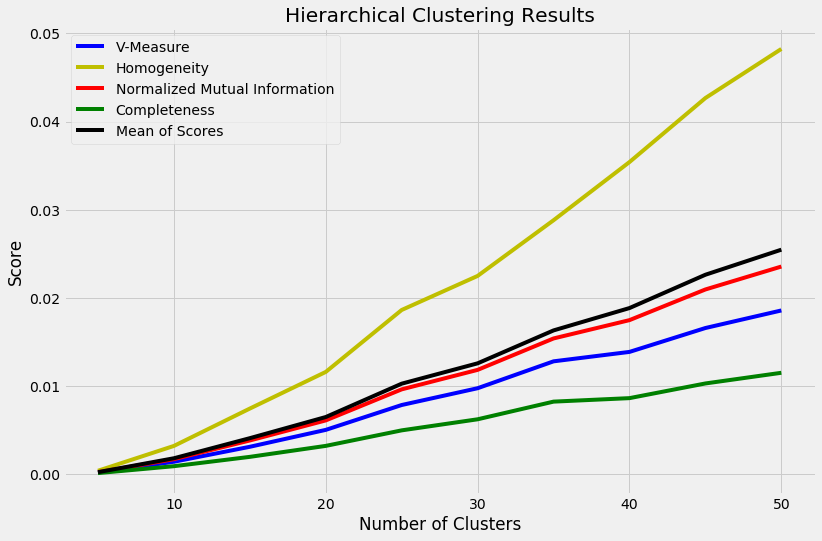

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Hierarchical Clustering Results')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.plot(x, y_vmeasure_hierarchical, color='b', label="V-Measure")
ax.plot(x, y_hom_hierarchical, color='y', label="Homogeneity")
ax.plot(x, y_nmi_hierarchical, color='r', label="Normalized Mutual Information")
ax.plot(x, y_complete_hierarchical, color='g', label="Completeness")
ax.plot(x, y_mean_hierarchical, color='black', label="Mean of Scores")
ax.legend(loc='best')
fig.savefig('../data/hierarchical_d2v_n2v_first.png')

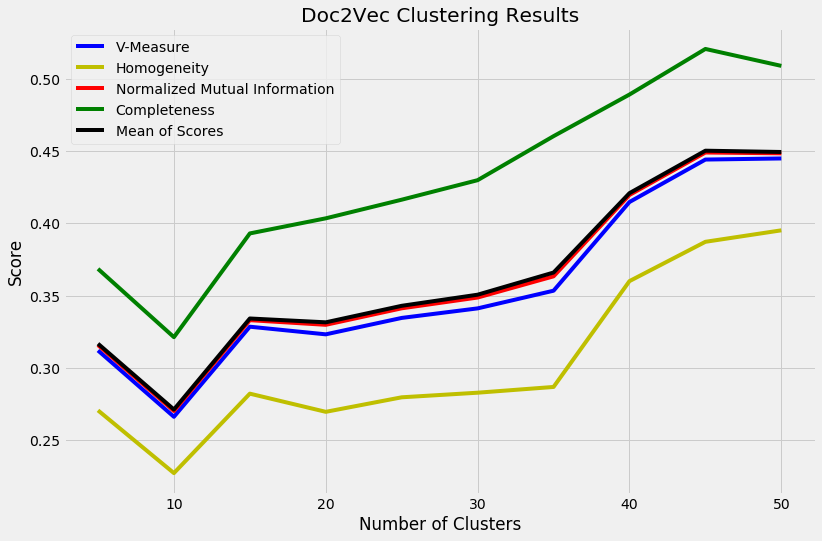

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Doc2Vec Clustering Results')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.plot(x, y_vmeasure_d2v, color='b', label="V-Measure")
ax.plot(x, y_hom_d2v, color='y', label="Homogeneity")
ax.plot(x, y_nmi_d2v, color='r', label="Normalized Mutual Information")
ax.plot(x, y_complete_d2v, color='g', label="Completeness")
ax.plot(x, y_mean_d2v, color='black', label="Mean of Scores")
ax.legend(loc='best')
fig.savefig('../data/d2v_clusters_first.png')

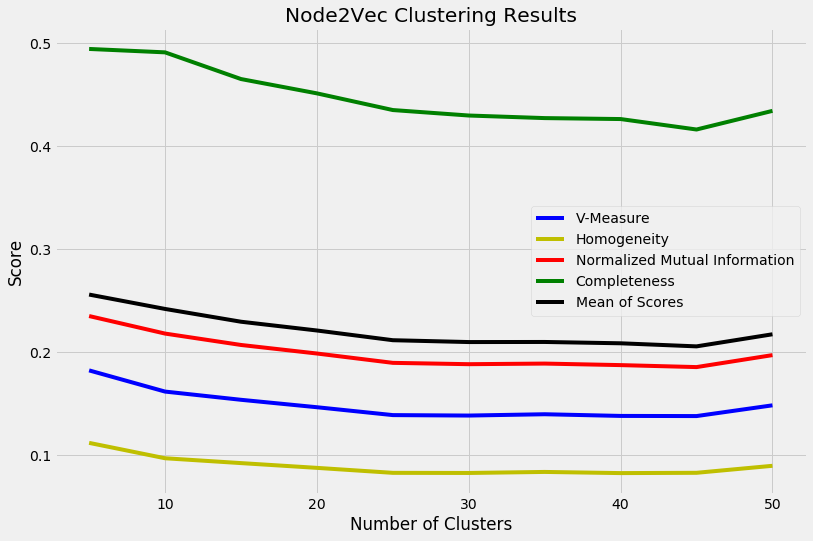

In [71]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Node2Vec Clustering Results')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.plot(x, y_vmeasure_n2v, color='b', label="V-Measure")
ax.plot(x, y_hom_n2v, color='y', label="Homogeneity")
ax.plot(x, y_nmi_n2v, color='r', label="Normalized Mutual Information")
ax.plot(x, y_complete_n2v, color='g', label="Completeness")
ax.plot(x, y_mean_n2v, color='black', label="Mean of Scores")
ax.legend(loc='best')
fig.savefig('../data/n2v_clusters_first.png')